In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Необходимо считать данные и перевести их в нужный формат:

In [2]:
df = pd.read_json('data.json')
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
shape_of_df = df.shape
shape_of_df

(39774, 3)

Столбец с ингридиентами представляет собой столбец списков строк.
Такие данные не получится использовать для машинного обучения, надо обработать их.

Добавим столбец, соответствующий количеству ингридиентов в рецепте

In [4]:
df['lenghts'] = df['ingredients'].apply(lambda x: len(x))

In [5]:
all_ingredients = []
for element in df['ingredients'].values:
    all_ingredients.extend(element)
all_ingredients = list(set(all_ingredients))
another_data = np.zeros([shape_of_df[0], len(all_ingredients)])
df_columns = pd.DataFrame(data=another_data,
          columns=all_ingredients)
df = pd.concat([df, df_columns], axis=1)
for i, element in enumerate(df['ingredients']):
    for ingredient in element:
        df.loc[i, ingredient] = 1

In [6]:
df.head(5)

,id,cuisine,ingredients,lenghts,burrito seasoning mix,Hogue Cabernet Sauvignon,Fisher Pecans,watercress,italian seasoning mix,"frozen chopped spinach, thawed and squeezed dry",...,treacle,vegetable gumbo mixture,soy sauce,orange blossom honey,steamed white rice,chile powder,thick-cut bacon,oven-ready lasagna noodles,sesame seeds buns,Adobo All Purpose Seasoning
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Уберём ненужные колонки с id и списком ингридиентов

In [7]:
df.drop(['id', 'ingredients'], axis=1)

,cuisine,lenghts,burrito seasoning mix,Hogue Cabernet Sauvignon,Fisher Pecans,watercress,italian seasoning mix,"frozen chopped spinach, thawed and squeezed dry",aged balsamic vinegar,grated horseradish,...,treacle,vegetable gumbo mixture,soy sauce,orange blossom honey,steamed white rice,chile powder,thick-cut bacon,oven-ready lasagna noodles,sesame seeds buns,Adobo All Purpose Seasoning
0,greek,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indian,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,italian,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,irish,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,chinese,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Для начала проанализируем, какая кухня является самой популярной в списке

In [ ]:
value_counts = df['cuisine'].value_counts()
value_counts

cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64

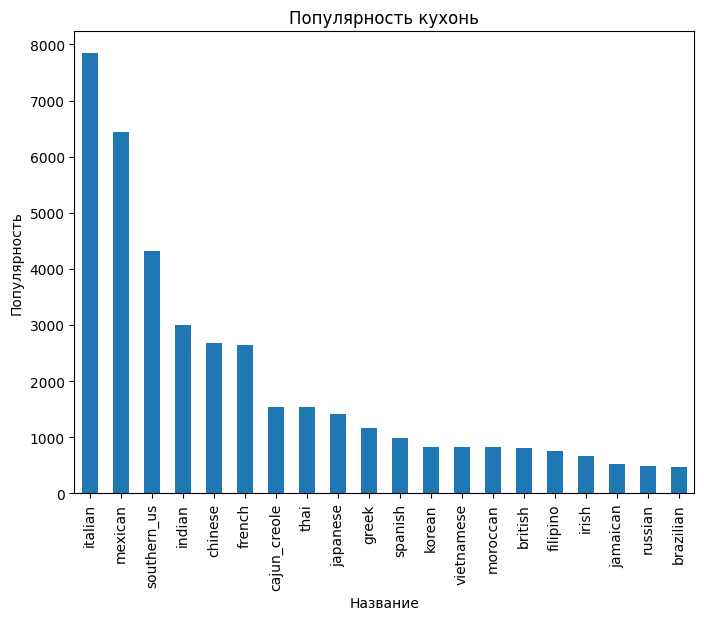

In [ ]:
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Популярность кухонь')
plt.xlabel('Название')
plt.ylabel('Популярность')
plt.show()

In [ ]:
cuisines_and_lenghts = {cuisine_name:[] for cuisine_name in value_counts.index}

In [ ]:
cuisines = list(value_counts.index)

In [ ]:
for i in range(shape_of_df[0]):
    current_cuisine = df['cuisine'][i]
    current_len = len(df['ingredients'][i])
    cuisines_and_lenghts[current_cuisine].append(current_len)

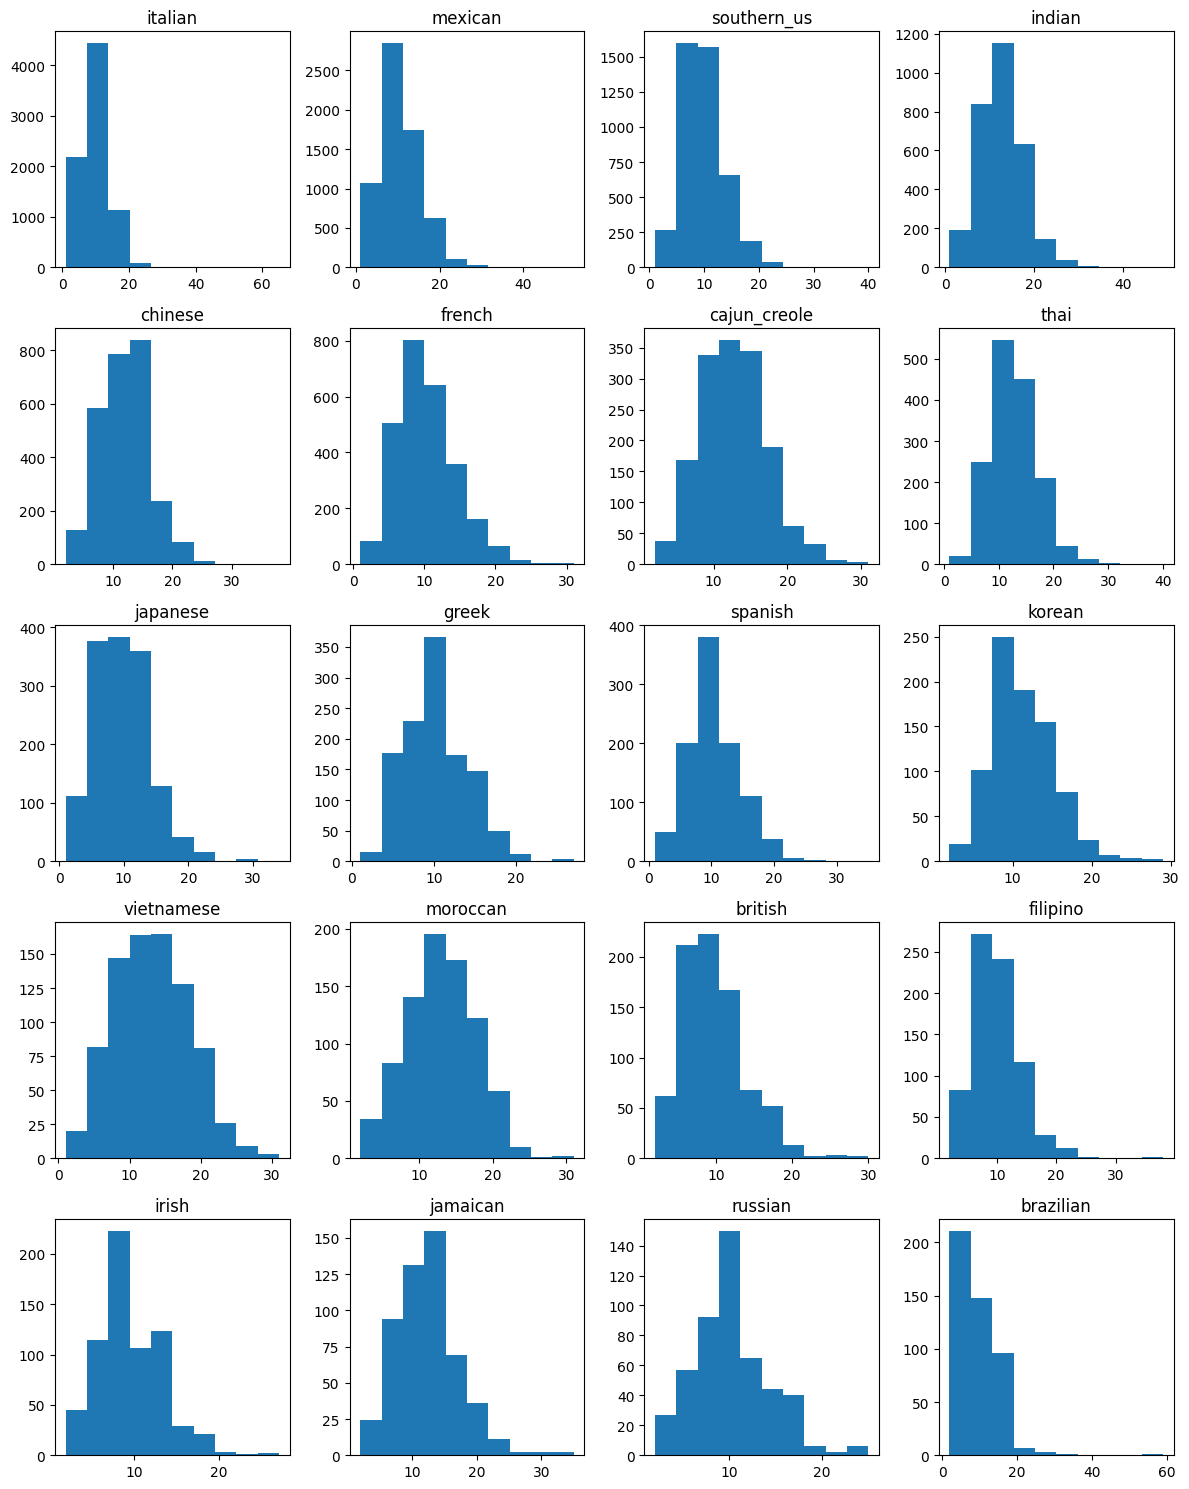

In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(12, 15))
flatten_axs = axs.flatten()

for i in range(20):
    ax = flatten_axs[i]
    current_cuisine = cuisines[i]
    ax.hist(cuisines_and_lenghts[current_cuisine], bins=10)
    ax.set_title(f'{current_cuisine}')

plt.tight_layout()
plt.show()

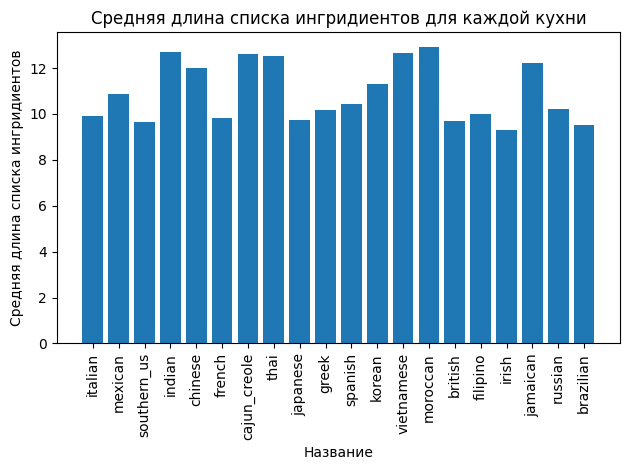

In [ ]:
keys = cuisines
values = [np.mean(cuisines_and_lenghts[cuisine]) for cuisine in cuisines]


plt.bar(keys, values)


plt.xlabel('Название')
plt.ylabel('Средняя длина списка ингридиентов')
plt.title('Средняя длина списка ингридиентов для каждой кухни')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Разделение данных на train & test samples

In [8]:
target = df['cuisine']
features = df.drop(columns=['cuisine'])

In [9]:
border = int(0.7*shape_of_df[0])
X_train = features.iloc[:border].drop(columns=['id', 'ingredients'])
X_test = features.iloc[border:].drop(columns=['id', 'ingredients'])
y_train = target.iloc[:border]
y_test = target.iloc[border:]

## Обучение моделей

Для начала попробуем самую простую модель классификации на несколько классов - логистиечскую регрессию.

In [10]:
clf = LogisticRegression(n_jobs=-1, solver='lbfgs')
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.7477583172714322

Линейная модель мультиклассификации дала точность 0.778.

In [ ]:
model = RandomForestClassifier(n_estimators=250, max_depth=20, n_jobs=-1)
model.fit(X_train, y_train)
accuracy_score(model.predict(X_test), y_test)

0.523841448085142

Результат оказался хуже после добавления параметра длины списка(до добавления скор линейной модели был 0.77784)